In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
document_text=input("Text Area")
text_file = open("sample.txt", "w")
text_file.write(document_text)
text_file.close()

Text AreaThe term "big cat" is typically used to refer to any of the five living members of the genus Panthera, namely the tiger, lion, jaguar, leopard, and snow leopard, as well as the non-pantherine cheetah and cougar.[1][2] However, only the first 4 of these species are able to roar.  Despite enormous differences in size, various cat species are quite similar in both structure and behaviour, with the exception of the cheetah, which significantly stands out from the other big and small cats. All cats are carnivores and some are efficient apex predators.[3] Their native ranges include the Americas, Africa, and Asia; the leopard's range also extends into Europe, specifically in Russia.


In [5]:
document_files=[doc for doc in os.listdir() if doc.endswith('.txt')]

In [6]:
document_files

['Cat.txt', 'Kitten.txt', 'sample.txt', 'wildcat.txt']

In [7]:
document_notes=[open(_file,encoding='utf-8').read() for _file in document_files]

In [8]:
document_notes

['The cat (Felis catus) is a domestic species of small carnivorous mammal.[1][2] \nIt is the only domesticated species in the family Felidae and is often referred to as the domestic cat to distinguish it from the wild members of the family.\n[4] A cat can either be a house cat, a farm cat or a feral cat; the latter ranges freely and avoids human contact.[5] \nDomestic cats are valued by humans for companionship and their ability to kill rodents. About 60 cat breeds are recognized by various cat registries.[6]\nThe cat is similar in anatomy to the other felid species: it has a strong flexible body, quick reflexes, sharp teeth and retractable claws adapted to killing small prey. \nIts night vision and sense of smell are well developed. \nCat communication includes vocalizations like meowing, purring, trilling, hissing, growling and grunting as well as cat-specific body language. \nA predator that is most active at dawn and dusk (crepuscular), the cat is a solitary hunter but a social spe

In [9]:
def vectorize(text):
    return TfidfVectorizer().fit_transform(text).toarray()

In [10]:
def similarity(doc1,doc2):
    return cosine_similarity([doc1,doc2])

In [11]:
vectors=vectorize(document_notes)

In [12]:
vectors

array([[0.        , 0.06033742, 0.06033742, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10839506, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08082447, 0.        , 0.        , ..., 0.        , 0.08082447,
        0.08082447]])

In [13]:
d_vectors=list(zip(document_files,vectors))

In [14]:
d_vectors

[('Cat.txt',
  array([0.        , 0.06033742, 0.06033742, 0.        , 0.04757071,
         0.06033742, 0.        , 0.04757071, 0.        , 0.        ,
         0.        , 0.        , 0.03851259, 0.        , 0.        ,
         0.        , 0.06033742, 0.28337912, 0.        , 0.        ,
         0.        , 0.09445971, 0.        , 0.15405037, 0.        ,
         0.06033742, 0.06033742, 0.        , 0.06033742, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.12067484, 0.        , 0.        , 0.06033742, 0.06033742,
         0.18101226, 0.        , 0.12067484, 0.        , 0.        ,
         0.06033742, 0.37783882, 0.07702519, 0.04757071, 0.        ,
         0.        , 0.04757071, 0.        , 0.06033742, 0.04757071,
         0.        , 0.06033742, 0.        , 0.04757071, 0.06033742,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.06033742, 0.        , 0.        , 0.06033742, 0.        ,
         0.        , 

In [15]:
plagiarism_results=set()

In [16]:
simi=dict()

In [17]:
def check_plagiarism():
    global s_vectors
    for document_a,text_vectors_a in d_vectors:
        new_vectors=d_vectors.copy()
        current_index=new_vectors.index((document_a,text_vectors_a))
        print(current_index)
        del new_vectors[current_index]
        for document_b,text_vectors_b in new_vectors:
            sim_score=similarity(text_vectors_a,text_vectors_b)[0][1]
            document_pairs=sorted((document_a,document_b))
            if(document_pairs[0]=='sample.txt'):
                simi[document_pairs[1]]=sim_score*100
            elif(document_pairs[1]=='sample.txt'):
                simi[document_pairs[0]]=sim_score*100
            score=(document_pairs[0],document_pairs[1],sim_score)
            plagiarism_results.add(score)
    return plagiarism_results     

In [18]:
for data in check_plagiarism():
    print(data)

0
1
2
3
('Kitten.txt', 'sample.txt', 0.15354608072481601)
('Cat.txt', 'sample.txt', 0.439573919041677)
('sample.txt', 'wildcat.txt', 0.46001053072525233)
('Kitten.txt', 'wildcat.txt', 0.25010583780871126)
('Cat.txt', 'Kitten.txt', 0.20728018366756992)
('Cat.txt', 'wildcat.txt', 0.47460055956163727)


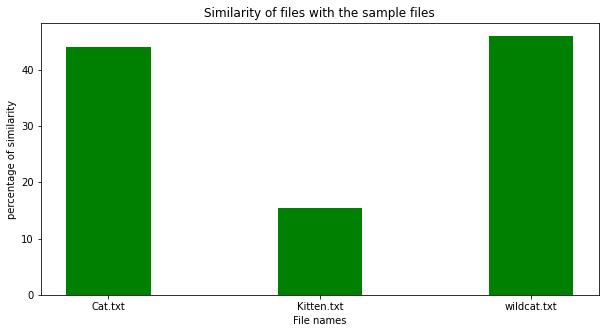

In [19]:
fig = plt.figure(figsize = (10,5))
plt.bar(list(simi.keys()),list(simi.values()), color ='green',width = 0.4)
plt.xlabel("File names")
plt.ylabel("percentage of similarity")
plt.title("Similarity of files with the sample files")
plt.show()